# 1.1 Loading the Data

In [1]:
# load libraries
import pandas as pd
import numpy as np

In [2]:
# import as pandas dataframe
day_df = pd.read_csv("./Bike Sharing Dataset/day.csv")

In [3]:
# explore data

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
# get number of samples (rows), number of features (columns), feature names, and data types

print(f"Number of samples: {day_df.shape[0]}")
print(f"Number of features: {day_df.shape[1]}") # NOTE: we don't believe that "instant" 
                                                # counts as a feature, but it is still counted here

# feature names
print(f"Feature names: {', '.join(day_df.columns)}") # NOTE: "instant" is still listed here as well

# determine datatypes for each feature
data_types = [str(x) for x in day_df.dtypes]
print(f"Data types: {', '.join(data_types)}")

Number of samples: 731
Number of features: 16
Feature names: instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
Data types: int64, object, int64, int64, int64, int64, int64, int64, int64, float64, float64, float64, float64, int64, int64, int64


Regarding data types, the data source further categorizes each variable, revealing the variable types rather than just the data types. This information is summarized below:

instant: Integer  
dteday: Date  
season: Categorical  
yr: Categorical  
mnth: Categorical  
hr: Categorical  
holiday: Binary  
weekday: Categorical  
workingday: Binary  
weathersit: Categorical  
temp: Continuous  
atemp: Continuous  
hum: Continuous  
windspeed: Continuous  
casual: Integer  
registered: Integer  
cnt: Integer  

# 1.2 Data Cleaning and Preprocessing

## Missing or Malformed Values

In [5]:
# count NaN entries per column
count = day_df.isna().sum()
print(f"NaN entries per column:\n{count}")

# interestingly, it doesn't seem that there are any NaN values

NaN entries per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# count ? entries per column
count_ques = (day_df == "?").sum()
print(f"\"?\" entries per column:\n{count_ques}")

"?" entries per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Based on this brief analysis, it seems that the data are fairly clean. Visting the data source, it is confirmed that none of the columns have missing variables. 

## Irrelevant or Identifier Features

In [7]:
# removing "instant" (a sample ID) and "cnt" (the target variable)
# we also remove "casual" and "registered", as their sum gives "cnt"
day_input = day_df.drop(columns = ["instant", "cnt", "casual", "registered"])

# confirm the drop
print(f"New features: {', '.join(day_input.columns)}")

New features: dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed


In [8]:
# create a dataframe for just the output column: 
day_output = day_df["cnt"]

## Feature Scaling and Normalization

According to the data source, all continuous variables in this dataset have already been normalized. Thus, we will skip this step of the process.

## Categorical (Discrete) Features

Of the remaining features (as previously discussed), "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", and "weathersit" are categorical or binary. The binary variables do not need to be one-hot encoded (because they sort of already are). This is the case for "holiday", and "workingday". Similarly, "yr" only has two categories so does not need to be modified either. 

While "season" and "weekday" are cyclical, they are not technically oridinal, as, for example, summer is not "larger" than spring or winter. Thus, they will be one-hot encoded. 

We will skip "mnth" and "hr", as these have fairly large ranges of values, despite them being cyclical as well. 

Finally, we will one-hot encode "weathersit", as this is clearly categorical, with only a few, non-ordinal categories. 

In [9]:
# replace columns with one-hot encoded versions

encoded_df = pd.get_dummies(day_input, columns=["season", "weathersit", "weekday"],
                        dtype=int, drop_first=True)

# drop_first=True saves us a column, and is ideal for linear regression
# (keeps the columns more independent)

print(encoded_df.head())

       dteday  yr  mnth  holiday  workingday      temp     atemp       hum  \
0  2011-01-01   0     1        0           0  0.344167  0.363625  0.805833   
1  2011-01-02   0     1        0           0  0.363478  0.353739  0.696087   
2  2011-01-03   0     1        0           1  0.196364  0.189405  0.437273   
3  2011-01-04   0     1        0           1  0.200000  0.212122  0.590435   
4  2011-01-05   0     1        0           1  0.226957  0.229270  0.436957   

   windspeed  season_2  season_3  season_4  weathersit_2  weathersit_3  \
0   0.160446         0         0         0             1             0   
1   0.248539         0         0         0             1             0   
2   0.248309         0         0         0             0             0   
3   0.160296         0         0         0             0             0   
4   0.186900         0         0         0             0             0   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0          0    

In [10]:
print(encoded_df.columns)

Index(['dteday', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')


## 1.3 Data Visualization and Exploratory Analysis

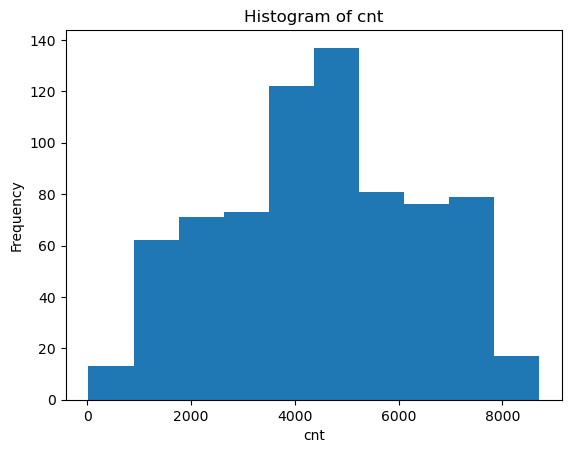

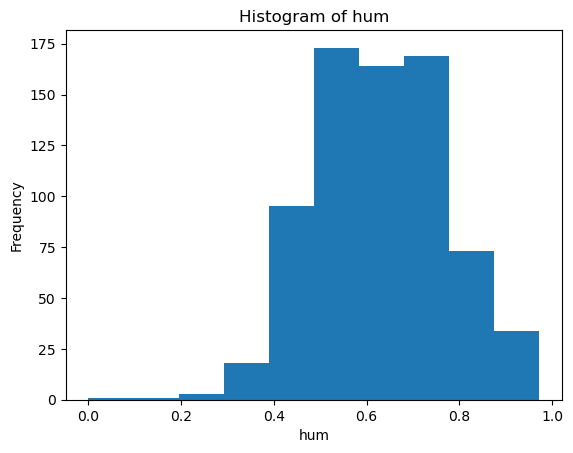

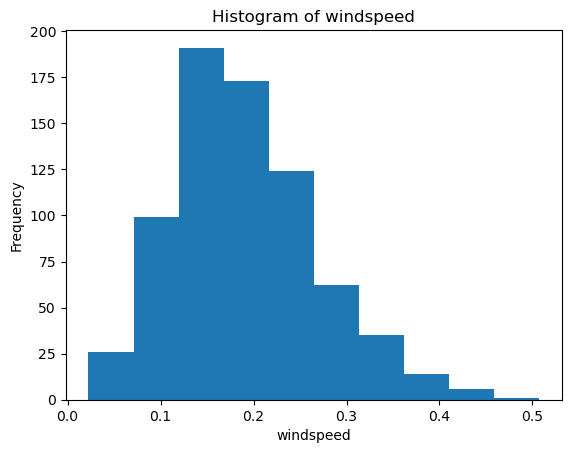

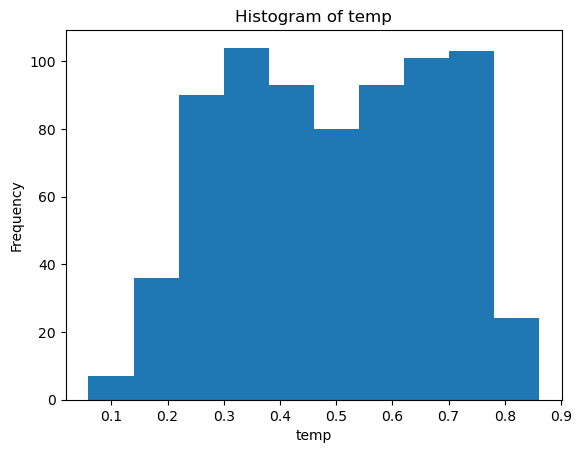

In [18]:
import matplotlib.pyplot as plt

hist_list = ["cnt", "hum", "windspeed", "temp"]

for x in hist_list:
    day_df[x].hist()
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {x}")
    plt.grid(False)
    plt.show()

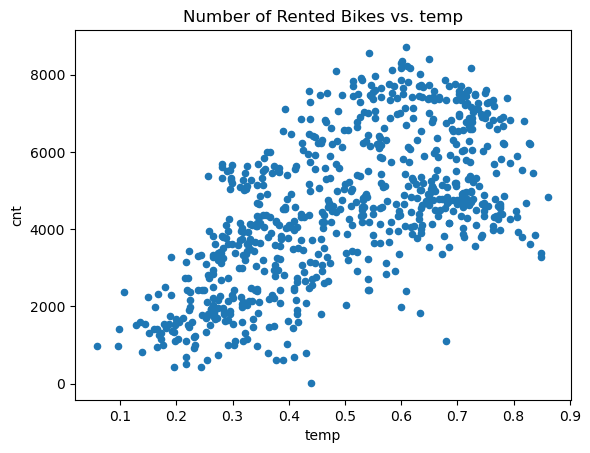

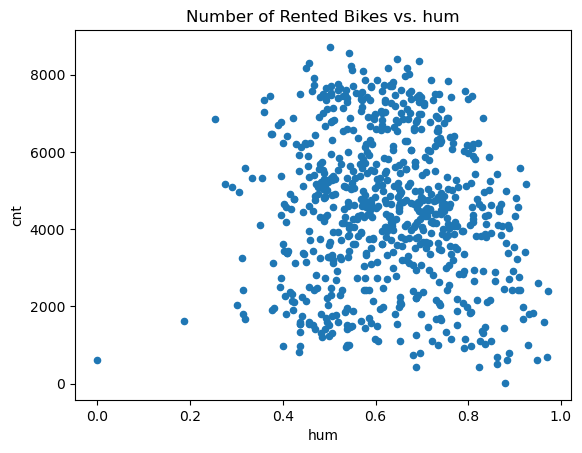

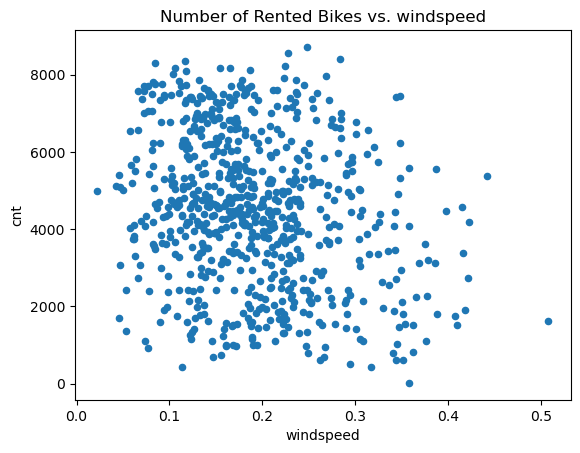

In [21]:
# scatter plots

scatter_list = ["temp", "hum", "windspeed"]

for s in scatter_list:
    day_df.plot.scatter(x=s, y="cnt")
    plt.title(f"Number of Rented Bikes vs. {s}")
    plt.show()

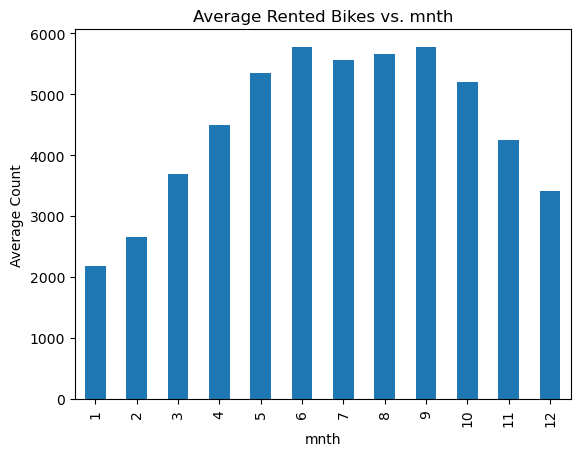

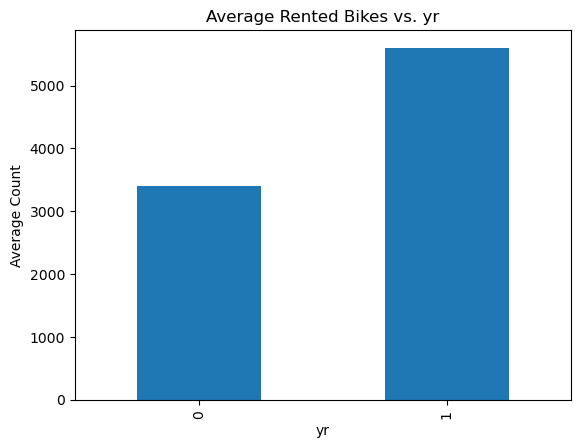

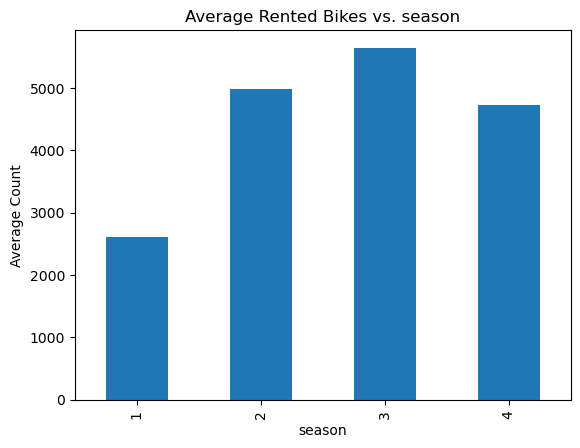

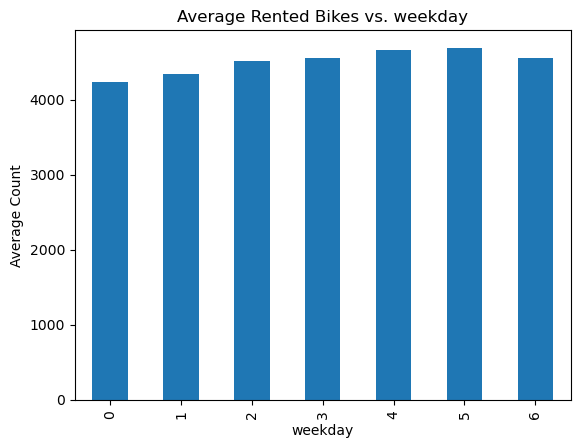

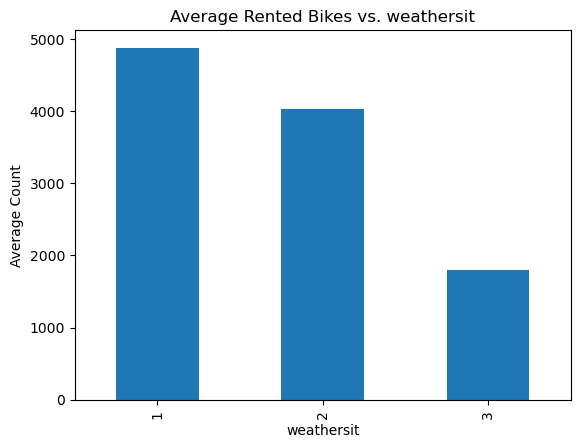

In [30]:
# bar plots

bar_list = ["mnth", "yr", "season", "weekday", "weathersit"]

for b in bar_list:
    day_df.groupby(b)['cnt'].mean().plot.bar() # average number sold in each category
    
    plt.title(f"Average Rented Bikes vs. {b}")
    plt.ylabel("Average Count")
    plt.show()